## Rainfall Predictions

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 :  Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


### Target Feature - rainfall

### Step 2 : Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [4]:
df.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Saperate X and Y(rainfall)

In [6]:
X = df.drop(columns=["rainfall"])
Y = df[["rainfall"]]

In [7]:
X.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8


In [8]:
Y.head()

,rainfall
0,1
1,1
2,1
3,1
4,0


### Step 4 : Feature Engineering on X

In [9]:
X.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
pre = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [12]:
X_pre = pre.fit_transform(X)
X_pre.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,-1.731260,-1.701361,0.671702,-0.913809,-0.642199,-0.448815,-0.199457,0.636434,0.681269,-0.729397,-0.560901,-0.465291
1,-1.729678,-1.691853,1.043116,-1.798289,-1.350846,-1.259418,-0.956001,1.662224,0.847728,-1.032804,-0.685925,0.009629
2,-1.728097,-1.682346,1.856688,-1.232222,-1.504067,-1.496667,-2.109731,-0.902250,-1.593680,1.256536,-0.435876,-0.374349
3,-1.726515,-1.672838,-0.035752,-1.462187,-1.178472,-1.041939,-0.691210,1.662224,1.069675,-1.032804,-0.560901,1.393971
4,-1.724933,-1.663331,1.449902,-0.896120,-1.063556,-1.378043,-2.052990,-3.851394,-1.704654,-0.039837,-0.810950,0.302665


### Step 5 : train_test_split

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=25)

In [14]:
xtrain.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
649,-0.704684,0.998783,1.273038,0.359842,0.353738,0.223392,-0.180543,-0.902250,-0.206516,1.091042,-0.185826,-0.778536
1427,0.525942,1.455146,0.565584,-0.966878,-0.891183,-0.903543,-0.937087,1.662224,0.903215,-1.032804,-0.560901,2.313498
332,-1.206109,1.455146,1.962806,-1.568324,-1.963730,-2.149104,-2.620398,-0.645802,0.681269,-1.032804,-1.061000,0.080362
1993,1.421231,-0.104092,-1.963566,1.297391,1.177300,1.370098,1.181237,-0.004684,-0.372976,0.622141,1.439496,0.110676
1687,0.937206,0.456853,-0.973129,0.324463,0.392043,0.519954,0.802965,0.892882,0.459322,-0.701815,0.939397,-1.384817


In [15]:
ytrain.head()

,rainfall
649,0
1427,1
332,1
1993,1
1687,1


In [16]:
xtest.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
2051,1.512974,0.447345,-0.194930,0.253704,0.372890,0.460642,0.632742,0.892882,0.292863,-0.425991,-0.310851,-0.202569
1166,0.113097,-1.026325,0.848566,-1.426808,-1.178472,-1.516438,-0.804692,1.662224,1.125161,-0.950057,-1.061000,-1.283770
1829,1.161819,-1.663331,2.528770,-1.603704,-1.753051,-2.070021,-2.052990,-0.645802,0.736755,-1.032804,-1.061000,2.040671
2101,1.592063,0.922723,0.618643,0.094498,0.296280,0.421100,0.500347,1.405776,0.070916,-0.950057,-0.435876,0.656329
616,-0.756883,0.685034,0.158798,0.660565,0.813400,0.875828,-0.010320,-0.389355,-1.649167,1.808185,-0.435876,1.009993


In [17]:
ytest.head()

,rainfall
2051,1
1166,1
1829,1
2101,1
616,0


In [18]:
xtrain.shape

(1533, 12)

In [19]:
xtest.shape

(657, 12)

### Step 6 : Model Building

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=4,
    criterion= "entropy"
)
model.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       min_samples_split=4)

In [21]:
model.score(xtrain, ytrain)

0.8499673842139596

In [22]:
model.score(xtest, ytest)

0.8462709284627092

* Hyperparameter tuning

In [26]:
params = {
    "n_estimators" : [50, 100, 150, 200, 250, 300],
    "max_depth" : [3, 4, 5, 6, 7]
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

base_model = RandomForestClassifier()

rscv_rf = RandomizedSearchCV(base_model, param_distributions=params, cv=5, scoring="f1_macro", n_jobs=-1)

rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='f1_macro')

In [28]:
rscv_rf.best_score_

np.float64(0.807030121504312)

In [29]:
rscv_rf.best_params_

{'n_estimators': 250, 'max_depth': 5}

In [30]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=5, n_estimators=250)

### Step 7 : Model evalution

In [31]:
best_rf.score(xtrain, ytrain)

0.8910632746249184

In [32]:
best_rf.score(xtest, ytest)

0.8660578386605784

In [33]:
ytest_pred = best_rf.predict(xtest)
ytest_pred[0:5]

array([1, 1, 1, 1, 0])

In [34]:
ytest.head()

,rainfall
2051,1
1166,1
1829,1
2101,1
616,0


* Confusion Matrix

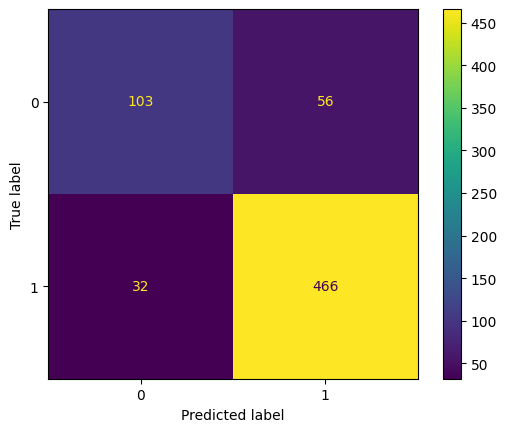

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, xtest, ytest)

* Classification report

In [36]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       159
           1       0.89      0.94      0.91       498

    accuracy                           0.87       657
   macro avg       0.83      0.79      0.81       657
weighted avg       0.86      0.87      0.86       657



### Step 8 : Out of sample predictions

In [37]:
xnew = pd.read_csv("test.csv")
xnew

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [38]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [40]:
xnew_pre = pre.transform(xnew)
xnew_pre

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,-1.729680,-1.727312,1.089945,-1.565186,-1.547695,-1.821155,-1.032049,1.706070,1.263248,-1.007591,-0.660310,0.182525
1,-1.724934,-1.717821,0.544699,-1.565186,-1.414980,-1.221217,-0.994926,1.834056,1.263248,-1.007591,-0.660310,1.288280
2,-1.720189,-1.708330,1.889640,-2.676564,-2.571492,-2.459799,-2.145743,0.426211,1.095855,-1.007591,-0.782869,-0.561346
3,-1.715444,-1.698840,1.707891,-1.018317,-1.263307,-1.337334,-2.034373,-0.981635,-1.749836,0.944687,-1.027988,2.826284
4,-1.710698,-1.689349,1.580667,-1.812159,-1.926879,-3.040384,-2.999575,-1.877537,-1.526645,1.522121,-1.027988,-0.310038
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.710698,1.689349,1.326219,-1.441699,-1.206429,-1.163159,-1.254788,1.706070,1.040057,-1.007591,-1.027988,1.187757
726,1.715444,1.698840,-0.327696,-0.559653,-1.111633,-1.182511,-0.827871,-0.597677,0.203089,-0.567641,-0.782869,0.272996
727,1.720189,1.708330,1.671542,-0.947753,-1.035796,-0.988983,-0.920679,1.194127,1.095855,-1.007591,-0.660310,-0.058730
728,1.724934,1.717821,0.163026,-0.947753,-0.751408,-0.466456,-0.122532,1.450099,0.928461,-1.007591,-0.660310,1.710477


In [41]:
pred = best_rf.predict(xnew_pre)
pred[0:5]

array([1, 1, 1, 0, 0])

In [42]:
res = xnew[["id"]]
res

,id
0,2190
1,2191
2,2192
3,2193
4,2194
...,...
725,2915
726,2916
727,2917
728,2918


In [44]:
res["rainfall"] = pred
res.head()

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0


In [46]:
res.to_csv("sample_result.csv")